# Module Import Block

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets Block

In [70]:
# converting Parquet Data to CSV
df_original = pd.read_parquet('./yellow_tripdata_2025-06.parquet', engine='pyarrow')
df_original.to_csv('yellow_tripdata_2025-06.csv', index=False)

# External Data Load Block

In [71]:
# Load Zone_Lookup CSV

df_zone_lookup_original = pd.read_csv('./taxi_zone_lookup.csv')

# Data Exploration

In [72]:
pd.DataFrame({
    'feature': df_original.columns.values,
    'data_type': df_original.dtypes.values,
    'null_value(%)': df_original.isna().mean().values * 100,
    'neg_value(%)': [len(df_original[col][df_original[col] < 0]) / len(df_original) * 100 if col in df_original.select_dtypes(include=[np.number]).columns else 0 for col in df_original.columns],
    '0_value(%)': [len(df_original[col][df_original[col] == 0]) / len(df_original) * 100 if col in df_original.select_dtypes(include=[np.number]).columns else 0 for col in df_original.columns],
    'duplicate' : df_original.duplicated().sum(),
    'n_unique': df_original.nunique().values,
    'sample_unique': [df_original[col].unique() for col in df_original.columns]}
).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,int32,0.000,0.000,0.000,0,4,"[1, 2, 7, 6]"
1,tpep_pickup_datetime,datetime64[ns],0.000,0.000,0.000,0,1854492,"[2025-06-01 00:02:50, 2025-06-01 00:11:27, 202..."
2,tpep_dropoff_datetime,datetime64[ns],0.000,0.000,0.000,0,1853786,"[2025-06-01 00:39:51, 2025-06-01 00:35:35, 202..."
3,passenger_count,float64,28.058,0.000,0.527,0,10,"[1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 8.0, ..."
4,trip_distance,float64,0.000,0.000,3.120,0,5100,"[10.0, 3.93, 0.7, 17.0, 2.22, 0.9, 1.9, 0.5, 2..."
5,RatecodeID,float64,28.058,0.000,0.000,0,7,"[1.0, 2.0, 99.0, 5.0, 4.0, 3.0, 6.0, nan]"
6,store_and_fwd_flag,object,28.058,0.000,0.000,0,2,"[N, Y, None]"
7,PULocationID,int32,0.000,0.000,0.000,0,259,"[138, 158, 230, 132, 48, 164, 246, 113, 249, 1..."
8,DOLocationID,int32,0.000,0.000,0.000,0,261,"[50, 237, 163, 232, 234, 90, 113, 249, 142, 14..."
9,payment_type,int64,0.000,0.000,28.058,0,6,"[1, 2, 3, 4, 5, 0]"


In [73]:
df_original.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322960 entries, 0 to 4322959
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               4322960 non-null  int32         
 1   tpep_pickup_datetime   4322960 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  4322960 non-null  datetime64[ns]
 3   passenger_count        3110014 non-null  float64       
 4   trip_distance          4322960 non-null  float64       
 5   RatecodeID             3110014 non-null  float64       
 6   store_and_fwd_flag     3110014 non-null  object        
 7   PULocationID           4322960 non-null  int32         
 8   DOLocationID           4322960 non-null  int32         
 9   payment_type           4322960 non-null  int64         
 10  fare_amount            4322960 non-null  float64       
 11  extra                  4322960 non-null  float64       
 12  mta_tax                43229

In [74]:
df_original.nunique()

VendorID                       4
tpep_pickup_datetime     1854492
tpep_dropoff_datetime    1853786
passenger_count               10
trip_distance               5100
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 259
DOLocationID                 261
payment_type                   6
fare_amount                11991
extra                         77
mta_tax                       66
tip_amount                  4798
tolls_amount                1367
improvement_surcharge          4
total_amount               23508
congestion_surcharge           3
Airport_fee                    5
cbd_congestion_fee             4
dtype: int64

* Checking statistical number of all data in dataset

In [75]:
df_original.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,4.322960e+06,4322960,4322960,3.110014e+06,4.322960e+06,3.110014e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,3.110014e+06,3.110014e+06,4.322960e+06
mean,1.887364e+00,2025-06-15 23:11:14.554077952,2025-06-15 23:28:39.149329408,1.298270e+00,7.478361e+00,2.599210e+00,1.600238e+02,1.601093e+02,8.912664e-01,1.897800e+01,1.129404e+00,4.772766e-01,2.752655e+00,5.100199e-01,9.545138e-01,2.738722e+01,2.181600e+00,1.588413e-01,5.332318e-01
min,1.000000e+00,2025-05-31 22:34:26,2025-05-31 22:43:36,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.900000e+02,-7.500000e+00,-2.174000e+01,-7.007000e+01,-1.090600e+02,-1.000000e+00,-9.942500e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-06-08 05:03:50.750000128,2025-06-08 05:19:49.500000,1.000000e+00,1.070000e+00,1.000000e+00,1.140000e+02,1.070000e+02,0.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.601000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-06-15 17:58:00,2025-06-15 18:15:00.500000,1.000000e+00,1.920000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.420000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.175000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-06-23 13:25:21,2025-06-23 13:44:24.249999872,1.000000e+00,3.900000e+00,1.000000e+00,2.310000e+02,2.330000e+02,1.000000e+00,2.397000e+01,2.500000e+00,5.000000e-01,3.870000e+00,0.000000e+00,1.000000e+00,3.139000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-06-30 23:59:59,2025-07-01 22:36:42,9.000000e+00,2.612624e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.254780e+05,4.246000e+01,1.050000e+01,9.609400e+02,7.160500e+02,1.000000e+00,3.255285e+05,2.500000e+00,6.750000e+00,1.250000e+00
std,7.588800e-01,NaN,NaN,7.330376e-01,6.942321e+02,1.200176e+01,6.686664e+01,7.091911e+01,7.697741e-01,1.577826e+02,1.829902e+00,1.407145e-01,4.022928e+00,2.154179e+00,2.783022e-01,1.583694e+02,9.632568e-01,5.556769e-01,3.585827e-01


* Checking Data Distribution by Box Plot for numerical data, and checking for outliers

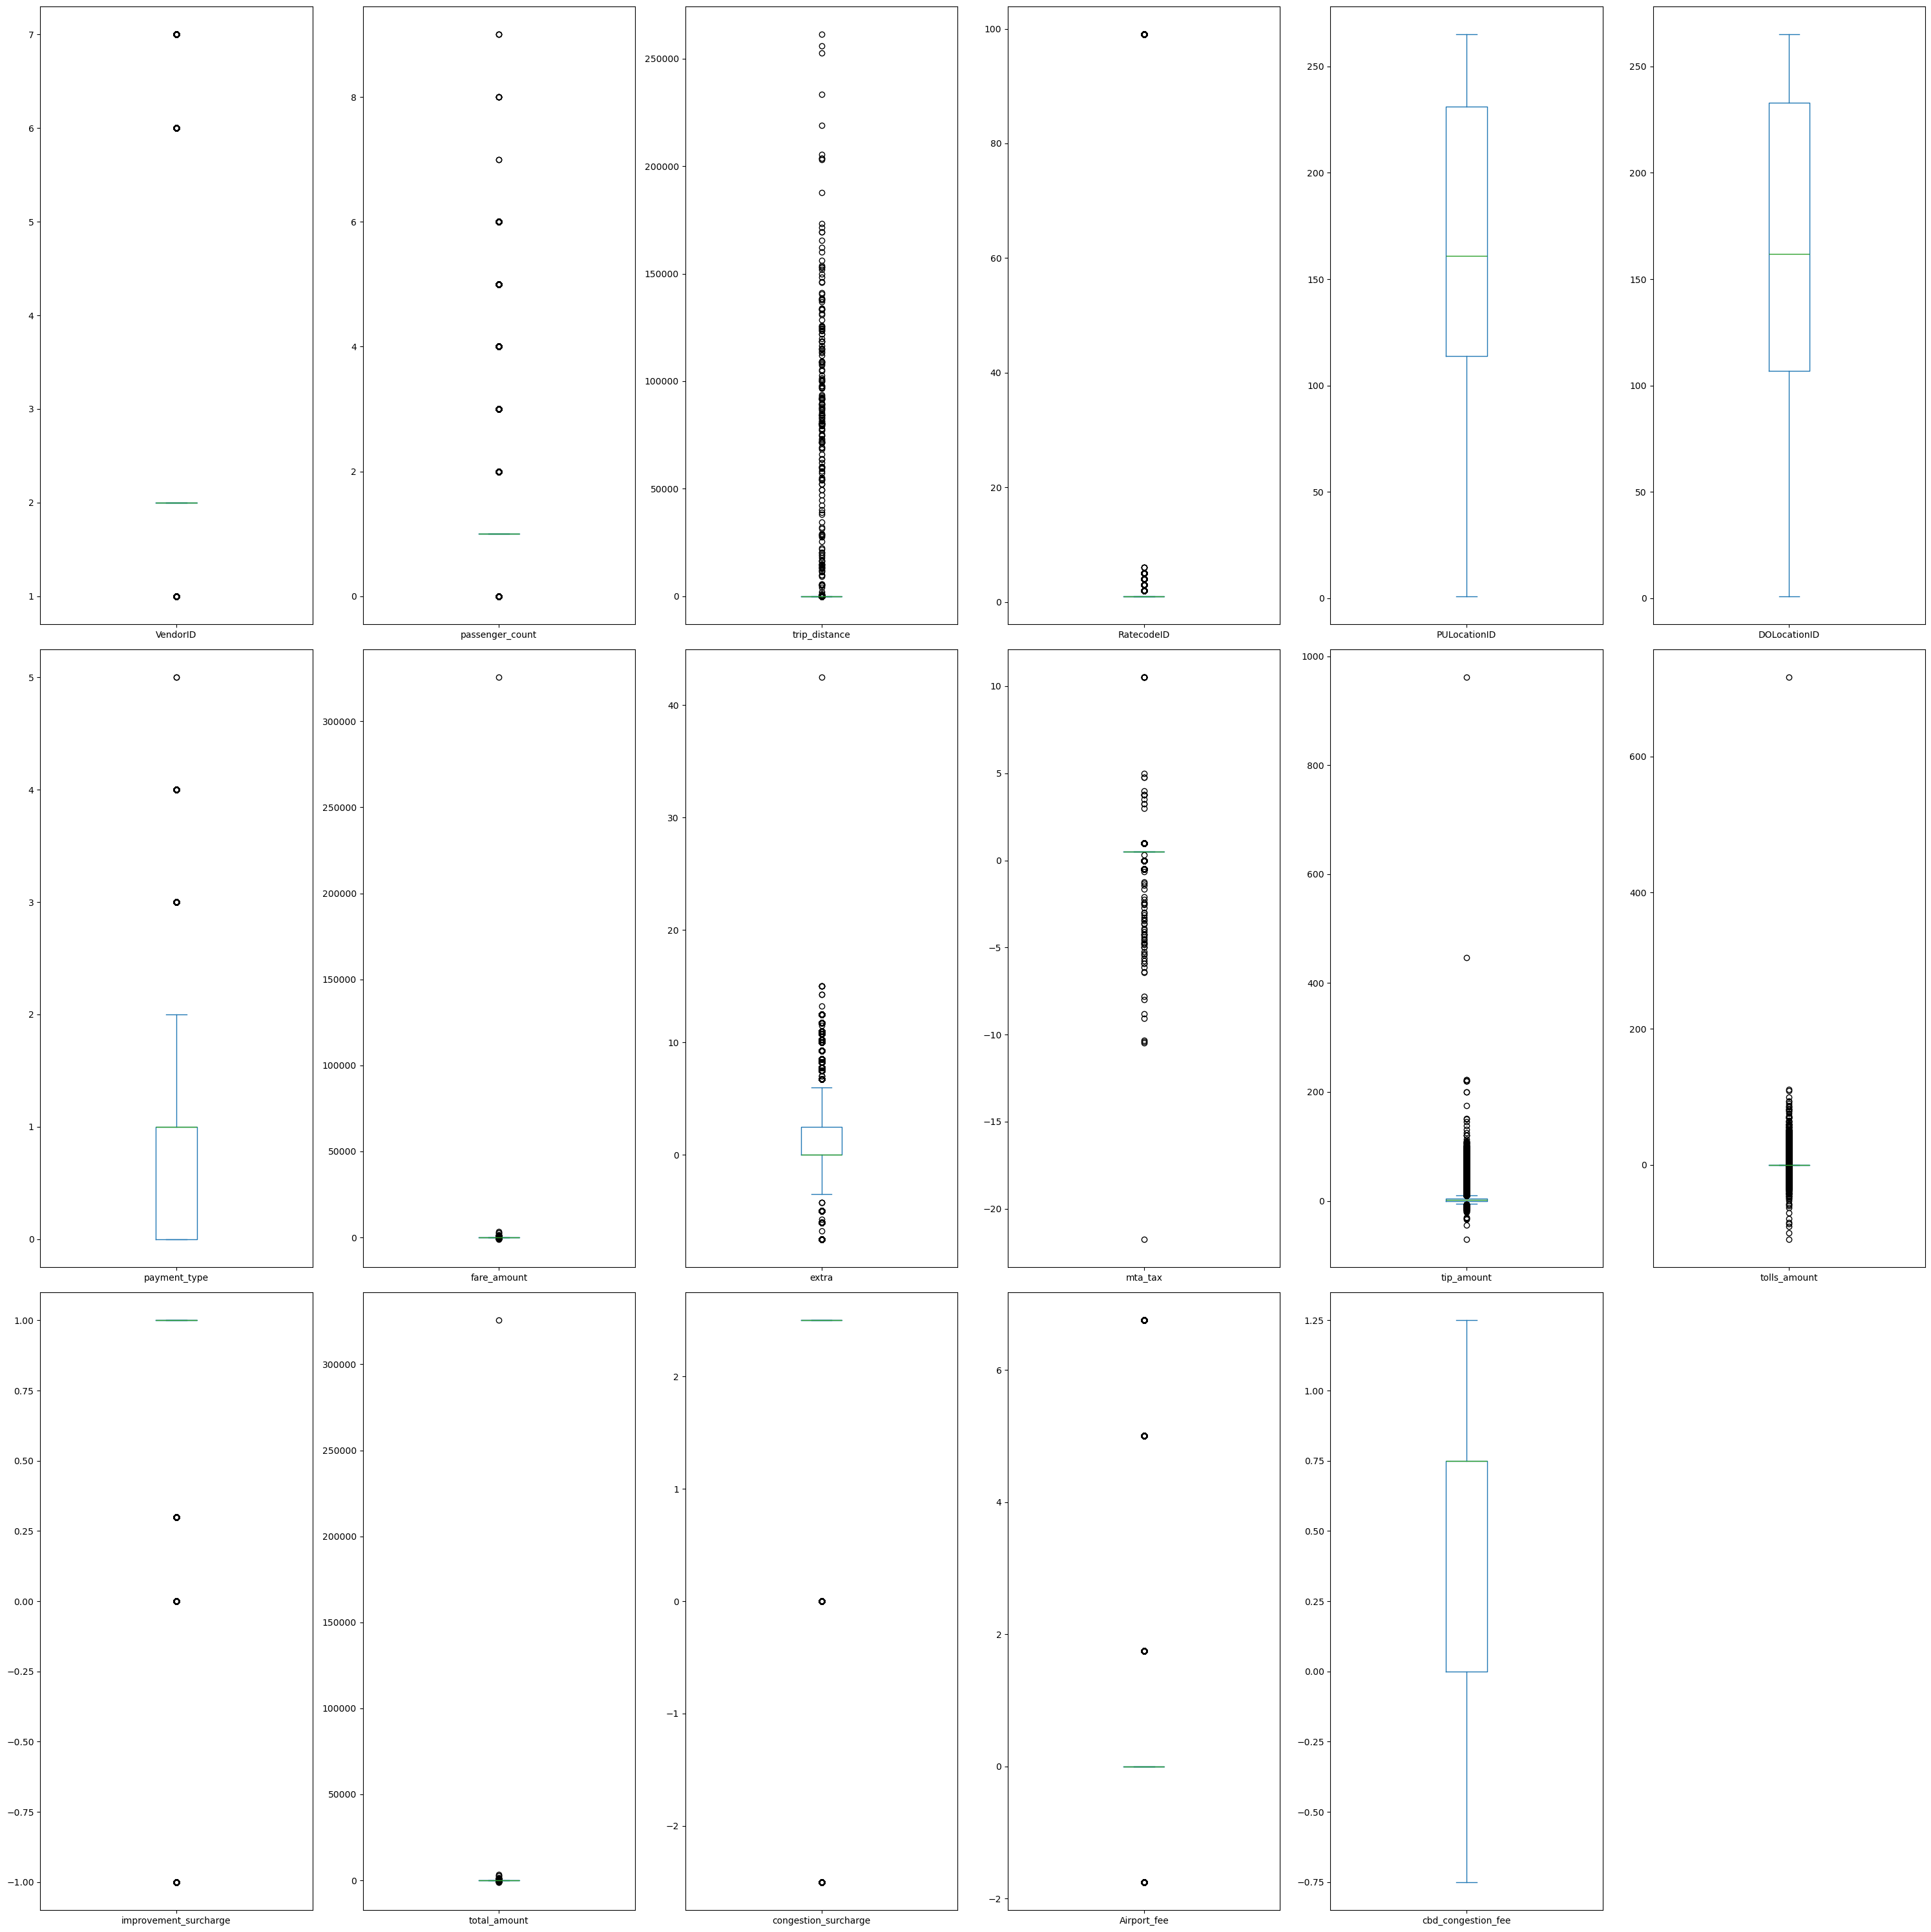

In [76]:
df_original.plot(
    kind='box', 
    subplots=True, 
    sharey=False,
    layout=(3, 6), 
    figsize=(30, 30)
)
 
# increase spacing between subplots

plt.tight_layout()
plt.show()

* Checking correlation of  numeric columns through correaltion heatmap, for deciding which column to drop and how to handle missing values.

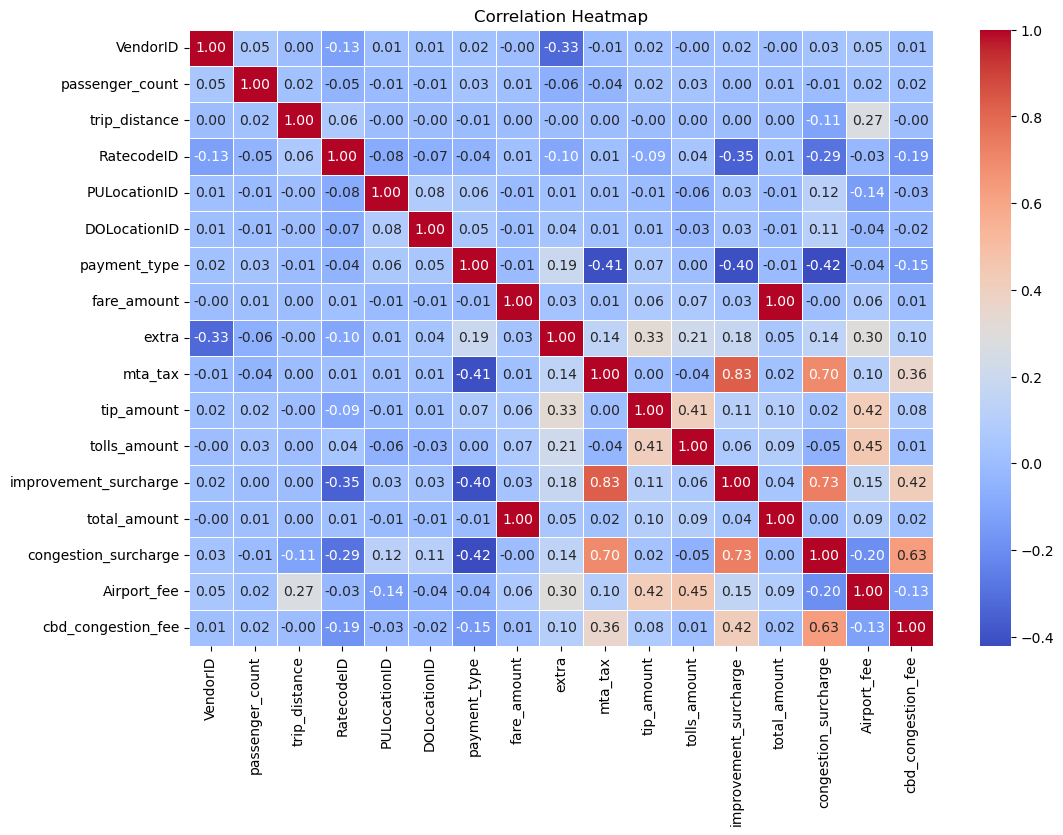

In [77]:
# Correlation ranges from -1 to +1
# +1: strong positive correlation
# -1: strong negative correlation
# 0: no linear correlation
# Correlation ≠ causation — especially in transactional or time series data

correlation_matrix=df_original.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Cleaning

In [78]:
# We will create copy of original data 
df_transformed = df_original.copy(deep=True)

### Following features will be dropped
1. extra: as it shows misc surcharges, we don't exactly know what it signifies, in addition to that it shows weak correaltion with other features. And not needed for out analysis goals

2. mta_tax: Data content is almost same, and it is not providing any extra insights.

3. tolls_amount: Has very weak correaltion with other features, meaning we cannot infer insights like,  if there is tolls meaning taxi is going out of city. Also, if taxi is going out of city or not can also be inferred from other fields like dropoff location. 

4. improvement_surcharge: not needed for anlaysis. Plus content is almost same and weak correlation wit other features

5. congestion_surcharge: can be use to infer "Prime/ Busy hours" but that can be inferred form number of trips taken during particular time of a day. Plus weak correlation wit other features

6. cbd_congestion_fee: not needed for analysis

7. store_and_fwd_flag: not needed for analysis

8. tolls_amount: not consistent, it included congetion_surcharge, cbd_surchare if there is airport_fee, otherwise not. Plus not needed for analysis

9. We will keep airport fee, so that we can identify that trip was to the airport, based on that OR you can add extra feature, like aiport_trip: Yes/No, for easy identification

In [79]:
df_transformed.drop([
    'extra',
    'mta_tax',
    'tolls_amount',
    'improvement_surcharge',
    'congestion_surcharge',
    'cbd_congestion_fee',
    'store_and_fwd_flag',
    'total_amount'
], axis=1, inplace=True)

df_transformed.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,Airport_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,138,50,1,47.8,20.15,1.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,158,237,1,24.7,6.09,0.00
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,230,163,1,7.2,2.59,0.00
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,132,232,1,70.0,5.00,0.00
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,48,234,1,20.5,5.25,0.00
5,1,2025-06-01 00:05:23,2025-06-01 00:16:57,0.0,0.90,1.0,164,90,2,11.4,0.00,0.00
6,1,2025-06-01 00:23:04,2025-06-01 00:35:25,0.0,1.90,1.0,246,113,1,12.8,3.70,0.00
7,1,2025-06-01 00:37:37,2025-06-01 00:42:28,0.0,0.70,1.0,113,113,1,7.2,2.55,0.00
8,1,2025-06-01 00:44:28,2025-06-01 00:50:01,0.0,0.50,1.0,249,249,1,7.2,2.55,0.00
9,1,2025-06-01 00:52:28,2025-06-01 01:03:29,1.0,2.50,1.0,249,142,1,13.5,5.75,0.00


# Handling Datatypes

* datatype of passenger_count is float, but it should be int
* It will be handled after dropping NaNs, because .astype can't work with NaNs
* Pandas won't let assign a float or NaN into an integer column without errors.

### Handling Duplicated Values

In [80]:
# df_transformed[df_transformed.duplicated()].sum()
df_transformed.duplicated().sum()

445

* From above it does look like there is no duplicate values but there are duplicate rows.
* It is not being detected because fare_amount is falsely showing negative data, so when we will turn it into positive in following code (as fare_amount can't be negative), there will be introduction of duplicates
* We can see that there are duplicated by just taking subset of values

In [81]:
# Make duplicated by subset data
duplicated_df = df_transformed[df_transformed.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicated_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,Airport_fee
80,2,2025-06-01 00:49:34,2025-06-01 00:50:44,1.0,0.14,1.0,68,68,4,-3.7,0.0,0.00
81,2,2025-06-01 00:49:34,2025-06-01 00:50:44,1.0,0.14,1.0,68,68,4,3.7,0.0,0.00
264,2,2025-06-01 00:30:21,2025-06-01 00:30:28,1.0,0.00,2.0,239,239,2,-70.0,0.0,0.00
265,2,2025-06-01 00:30:21,2025-06-01 00:30:28,1.0,0.00,2.0,239,239,2,70.0,0.0,0.00
331,2,2025-06-01 00:18:11,2025-06-01 00:18:21,1.0,0.02,1.0,113,113,4,-3.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3109960,2,2025-06-30 23:40:32,2025-07-01 00:13:10,1.0,17.52,2.0,132,234,3,70.0,0.0,1.75
3109972,2,2025-06-30 23:44:13,2025-06-30 23:49:36,1.0,0.60,1.0,234,234,4,-6.5,0.0,0.00
3109973,2,2025-06-30 23:44:13,2025-06-30 23:49:36,1.0,0.60,1.0,234,234,4,6.5,0.0,0.00
3109984,2,2025-06-30 23:15:12,2025-06-30 23:37:51,1.0,10.32,1.0,138,229,4,-41.5,0.0,-1.75


* From the results above, it can be seen that there is duplicated data, it's just that the duplicated data on fare_amount is a negative value so that when duplicate data is checked for all data features, it is not detected.

* So we need to eliminate this duplicated data so that in the negative data process we only need to convert it into positive data.

In [82]:
# Negative duplicated Data
neg_duplicated = duplicated_df[duplicated_df['fare_amount']<0]
print(len(neg_duplicated))

neg_duplicated

65859


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,Airport_fee
80,2,2025-06-01 00:49:34,2025-06-01 00:50:44,1.0,0.14,1.0,68,68,4,-3.7,0.0,0.00
264,2,2025-06-01 00:30:21,2025-06-01 00:30:28,1.0,0.00,2.0,239,239,2,-70.0,0.0,0.00
331,2,2025-06-01 00:18:11,2025-06-01 00:18:21,1.0,0.02,1.0,113,113,4,-3.0,0.0,0.00
458,2,2025-06-01 00:28:48,2025-06-01 00:43:28,1.0,3.17,1.0,142,75,4,-17.7,0.0,0.00
745,2,2025-06-01 00:57:23,2025-06-01 01:12:09,1.0,2.39,1.0,231,164,4,-15.6,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3109902,2,2025-06-30 23:46:05,2025-07-01 00:13:43,2.0,17.79,2.0,132,229,2,-70.0,0.0,-1.75
3109914,2,2025-06-30 23:54:37,2025-07-01 00:07:41,1.0,8.22,1.0,132,93,4,-31.7,0.0,-1.75
3109959,2,2025-06-30 23:40:32,2025-07-01 00:13:10,1.0,17.52,2.0,132,234,3,-70.0,0.0,-1.75
3109972,2,2025-06-30 23:44:13,2025-06-30 23:49:36,1.0,0.60,1.0,234,234,4,-6.5,0.0,0.00


* Drop Duplicated Data

In [83]:
df_transformed.drop(neg_duplicated.index, inplace=True)

In [84]:
# Now check if there are duplicates
df_transformed[df_transformed.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,Airport_fee
3792,2,2025-06-01 00:37:48,2025-06-01 00:46:43,1.0,0.00,1.0,158,158,2,0.0,0.0,0.00
3793,2,2025-06-01 00:37:48,2025-06-01 00:46:43,1.0,0.00,1.0,158,158,2,0.0,0.0,0.00
5684,2,2025-06-01 01:57:02,2025-06-01 01:57:14,2.0,0.06,1.0,237,237,2,0.0,0.0,0.00
5685,2,2025-06-01 01:57:02,2025-06-01 01:57:14,2.0,0.06,1.0,237,237,2,0.0,0.0,0.00
5922,2,2025-06-01 01:09:14,2025-06-01 01:15:16,3.0,0.10,1.0,234,234,2,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3062652,2,2025-06-30 14:44:32,2025-06-30 14:47:44,1.0,0.00,1.0,48,48,2,0.0,0.0,0.00
3069106,2,2025-06-30 15:04:58,2025-06-30 15:06:59,1.0,0.00,1.0,170,170,2,0.0,0.0,0.00
3069107,2,2025-06-30 15:04:58,2025-06-30 15:06:59,1.0,0.00,1.0,170,170,2,0.0,0.0,0.00
3070548,2,2025-06-30 15:48:40,2025-06-30 16:09:02,1.0,5.20,2.0,132,203,2,0.0,0.0,-1.75


* So there are still duplicate rows but because fare_amount is 0.0 (this will be handle in following code), but if we only check for negative fare_amount, there are no duplicaes as shown below.

In [85]:
# Now check if there are duplicates
df_transformed[df_transformed.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)][df_transformed['fare_amount']<0]

/var/folders/09/xh04kkmx3gxdb5gg2vtyx_2c0000gn/T/ipykernel_1469/625274469.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_transformed[df_transformed.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)][df_transformed['fare_amount']<0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,Airport_fee


### Handling Negative and Zero Values

In [86]:
# Negative Value Percentage
pd.DataFrame({
    'feature': df_transformed.columns.values,
    'neg_value(%)': [
        len(df_transformed[col][df_transformed[col] < 0]) / len(df_transformed) * 100 
        if np.issubdtype(df_transformed[col].dtype, np.number) else 0 
        for col in df_transformed.columns
    ]
}).round(3)

,feature,neg_value(%)
0,VendorID,0.000
1,tpep_pickup_datetime,0.000
2,tpep_dropoff_datetime,0.000
3,passenger_count,0.000
4,trip_distance,0.000
5,RatecodeID,0.000
6,PULocationID,0.000
7,DOLocationID,0.000
8,payment_type,0.000
9,fare_amount,4.926


In [87]:
# Zero Value Percentage
pd.DataFrame({
    'feature': df_transformed.columns.values,
    'data_type': df_transformed.dtypes.values,
    '0_value(%)': [len(df_transformed[col][df_transformed[col] == 0]) / len(df_transformed) * 100 if np.issubdtype(df_transformed[col].dtype, np.number) else 0 for col in df_transformed.columns]
}).round(3)

,feature,data_type,0_value(%)
0,VendorID,int32,0.000
1,tpep_pickup_datetime,datetime64[ns],0.000
2,tpep_dropoff_datetime,datetime64[ns],0.000
3,passenger_count,float64,0.535
4,trip_distance,float64,3.060
5,RatecodeID,float64,0.000
6,PULocationID,int32,0.000
7,DOLocationID,int32,0.000
8,payment_type,int64,28.492
9,fare_amount,float64,0.046


* 1. Fare amount can't be negative or zero

In [88]:
# Check total rows with fare_amount <= 0

len(df_transformed[df_transformed['fare_amount']<=0])

211668

In [89]:
# Make negative value of fare_amount to positive
df_transformed['fare_amount'] = df_transformed['fare_amount'].abs()

In [90]:
df_transformed = df_transformed[df_transformed['fare_amount'] > 0]

* 2. Trip Distance can't be zero

In [91]:
# check if trip_distance < 0
len(df_transformed[df_transformed['trip_distance']<0])

0

In [92]:
# Now remove all the rows with trip_distance = 0 since trips need to be > 0
df_transformed = df_transformed[df_transformed['trip_distance'] > 0]

In [93]:
# check now if all trip_distance is >0 
len(df_transformed[df_transformed['trip_distance'] == 0])

0

### Handling Missing Values

In [94]:
# NaN values?
df_original.columns[df_original.isna().any()].tolist()

['passenger_count',
 'RatecodeID',
 'store_and_fwd_flag',
 'congestion_surcharge',
 'Airport_fee']

In [95]:
# Before handling NaN or None values, let's check the count of missing values for each field to decide how to handle it
# basically checking if missing values are rare or higher

passenger_nan_count = df_original['passenger_count'].isna().sum()
ratecode_nan_count = df_original['RatecodeID'].isna().sum()
congestion_surcharge_nan_count = df_original['congestion_surcharge'].isna().sum()
airport_fee_nan_count = df_original['Airport_fee'].isna().sum()

print(passenger_nan_count, ratecode_nan_count, congestion_surcharge_nan_count, airport_fee_nan_count)


1212946 1212946 1212946 1212946


<Axes: >

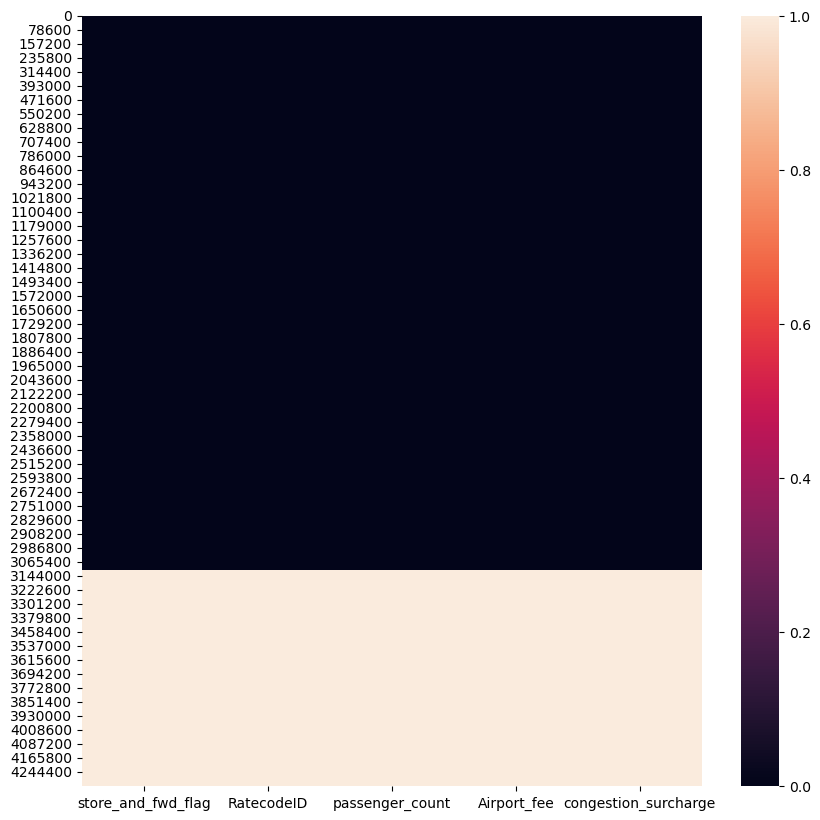

In [96]:
# Missing value heatmap, 1 indicates missing value
plt.figure(figsize=(10,10))
# Based missing value on certain column from table above
sns.heatmap(df_original[['store_and_fwd_flag','RatecodeID','passenger_count','Airport_fee','congestion_surcharge']].isna())

So looking at the results, it can be seen that the missing data is all data in the same row

* 1. passenger_count
* Handling missing and incorrect values of passenger_count
* Since there is no correlation of passenger_count with other features according to correaltion matrix, we will handle missing and incorrect values of passenger_count by replacing them with Median. 

In [97]:
# Replacing missing value and 0 of passenger_count with median

median_value = df_transformed['passenger_count'].median()
df_transformed.loc[ (df_transformed['passenger_count'].isna()) | (df_transformed['passenger_count']==0.0), 'passenger_count'] = median_value

* 2. RatecodeID
* Handling missing and incorrect values of RatecodeID

In [98]:
df_transformed.sample(n=20,random_state=42)
# df_transformed['cbd_congestion_fee'].nunique()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,Airport_fee
2472240,1,2025-06-24 19:34:02,2025-06-24 19:42:32,1.0,0.60,1.0,164,230,1,8.60,3.15,0.00
2929614,2,2025-06-28 22:49:16,2025-06-28 23:00:30,2.0,1.77,1.0,211,164,1,12.10,3.57,0.00
3148601,2,2025-06-01 22:11:47,2025-06-01 22:29:16,1.0,3.95,NaN,61,181,0,20.31,0.00,NaN
3194417,1,2025-06-03 21:30:00,2025-06-03 21:41:38,1.0,2.20,NaN,256,148,0,12.87,0.00,NaN
1365977,1,2025-06-13 18:35:20,2025-06-13 18:42:08,1.0,1.40,1.0,142,238,1,9.30,3.16,0.00
1233463,1,2025-06-12 16:44:04,2025-06-12 17:20:45,1.0,7.40,1.0,132,38,1,34.50,8.05,1.75
504428,2,2025-06-05 18:52:15,2025-06-05 18:59:30,1.0,0.85,1.0,137,162,1,8.60,3.17,0.00
1190442,1,2025-06-12 10:08:44,2025-06-12 10:16:10,1.0,0.60,1.0,237,237,1,7.90,2.40,0.00
4030827,2,2025-06-23 15:27:28,2025-06-23 15:40:27,1.0,3.41,NaN,224,209,0,4.75,0.00,NaN
323293,1,2025-06-04 11:22:58,2025-06-04 11:28:53,1.0,0.60,1.0,237,237,1,7.20,2.25,0.00


In [99]:
df_transformed['passenger_count'].value_counts()

passenger_count
1.0    3522299
2.0     416088
3.0     100395
4.0      63410
5.0      14840
6.0       8574
8.0          3
7.0          2
9.0          1
Name: count, dtype: int64

* We need to merge our original dataframe with zone_lookup df as we need to get info on borough and zone
* But we will only include 3 columns from original zone_lookup df,  locationID, borough, zone. And will exclude service_zone as that is not important for our data and context

In [100]:
# getting 3 columns from og df
df_zone_lookup_transformed = df_zone_lookup_original.iloc[:,:3].copy(deep=True)
# df_zone_lookup_transformed = df_zone_lookup_transformed.reset_index(drop=True)
df_zone_lookup_transformed

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,NaN


In [101]:
# check null in zone_lookup table
# df_zone_lookup_transformed.isna().sum()
# df_zone_lookup_transformed.isnull().sum()
df_zone_lookup_transformed[df_zone_lookup_transformed.isnull().any(axis=1)]

,LocationID,Borough,Zone
263,264,Unknown,NaN
264,265,NaN,Outside of NYC


* so, as there are null values on ID 264, 265 in zone_lookup table we will just replace it with "UNKNOWN"

In [102]:
df_zone_lookup_transformed[['Borough', 'Zone']] = df_zone_lookup_transformed[['Borough', 'Zone']].fillna('Unknown')
df_zone_lookup_transformed

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,Unknown


In [103]:
# Merge both tables

df_trip_zone = pd.merge(df_transformed, df_zone_lookup_transformed.add_prefix('PU'), left_on='PULocationID', right_on='PULocationID', how='left')
df_trip_zone = pd.merge(df_trip_zone, df_zone_lookup_transformed.add_prefix('DO'), left_on='DOLocationID', right_on='DOLocationID', how='left')
print('Total data: ', len(df_trip_zone))

df_trip_zone.sample(n=10, random_state=42)

Total data:  4125612


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
2391196,1,2025-06-24 19:34:02,2025-06-24 19:42:32,1.0,0.60,1.0,164,230,1,8.60,3.15,0.00,Manhattan,Midtown South,Manhattan,Times Sq/Theatre District
2833095,2,2025-06-28 22:49:16,2025-06-28 23:00:30,2.0,1.77,1.0,211,164,1,12.10,3.57,0.00,Manhattan,SoHo,Manhattan,Midtown South
3044811,2,2025-06-01 22:11:47,2025-06-01 22:29:16,1.0,3.95,NaN,61,181,0,20.31,0.00,NaN,Brooklyn,Crown Heights North,Brooklyn,Park Slope
3085509,1,2025-06-03 21:30:00,2025-06-03 21:41:38,1.0,2.20,NaN,256,148,0,12.87,0.00,NaN,Brooklyn,Williamsburg (South Side),Manhattan,Lower East Side
1323005,1,2025-06-13 18:35:20,2025-06-13 18:42:08,1.0,1.40,1.0,142,238,1,9.30,3.16,0.00,Manhattan,Lincoln Square East,Manhattan,Upper West Side North
1194799,1,2025-06-12 16:44:04,2025-06-12 17:20:45,1.0,7.40,1.0,132,38,1,34.50,8.05,1.75,Queens,JFK Airport,Queens,Cambria Heights
488909,2,2025-06-05 18:52:15,2025-06-05 18:59:30,1.0,0.85,1.0,137,162,1,8.60,3.17,0.00,Manhattan,Kips Bay,Manhattan,Midtown East
1153019,1,2025-06-12 10:08:44,2025-06-12 10:16:10,1.0,0.60,1.0,237,237,1,7.90,2.40,0.00,Manhattan,Upper East Side South,Manhattan,Upper East Side South
3861765,2,2025-06-23 15:27:28,2025-06-23 15:40:27,1.0,3.41,NaN,224,209,0,4.75,0.00,NaN,Manhattan,Stuy Town/Peter Cooper Village,Manhattan,Seaport
313162,1,2025-06-04 11:22:58,2025-06-04 11:28:53,1.0,0.60,1.0,237,237,1,7.20,2.25,0.00,Manhattan,Upper East Side South,Manhattan,Upper East Side South


In [104]:
# Checking for null in new dataframe df_trip_zone
df_trip_zone.isna().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID               1119174
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
tip_amount                     0
Airport_fee              1119174
PUBorough                      0
PUZone                         0
DOBorough                      0
DOZone                         0
dtype: int64

In [105]:
df_trip_zone['RatecodeID'].value_counts()

RatecodeID
1.0     2803535
2.0      112528
99.0      46572
5.0       23614
3.0       10237
4.0        9952
Name: count, dtype: int64

* Let's Fix RatecodeID = 4

* for RC4, we are checking, how many PU/DO Borough is not within city limits
* The five boroughs of NYC are:

1. Manhattan
2. Brooklyn
3. Queens
4. Bronx
5. Staten Island

In [106]:
df_trip_zone[
    (df_trip_zone['RatecodeID']==4) & 
    ((df_trip_zone['PUBorough']!='Manhattan') & 
     (df_trip_zone['PUBorough']!='Queens') & 
     (df_trip_zone['PUBorough']!='Brooklyn') &
     (df_trip_zone['PUBorough']!='Bronx') &
     (df_trip_zone['DOBorough']!='Manhattan') &
     (df_trip_zone['DOBorough']!='Queens') &
     (df_trip_zone['DOBorough']!='Brooklyn') &
     (df_trip_zone['DOBorough']!='Bronx') 
    )
][['PUBorough', 'DOBorough']]

,PUBorough,DOBorough
57575,Unknown,Unknown
175994,Unknown,Unknown
179053,Unknown,Unknown
197924,Unknown,Unknown
230623,Unknown,Unknown
238937,Unknown,Unknown
351389,Unknown,Unknown
356960,Unknown,Unknown
368308,Unknown,Unknown
391593,Unknown,Unknown


* From above we can see that there are 2 entries with DOBorough as EWR, which is outdise city limit and PUBorough is unknown, so we might need to drop this. If PUBorough would have been manhanttan then it got RC3.
* And rest all rows are unknown
* for RC4 it could be from or to Nassau or westchester and they are outside of city. So, if any one either PU or DO borough is unknown then we need to drop it

In [107]:
df_trip_zone.drop(df_trip_zone[ (df_trip_zone['RatecodeID']==4) & (df_trip_zone['PUBorough']=='Unknown') ].index, inplace=True)
df_trip_zone.drop(df_trip_zone[ (df_trip_zone['RatecodeID']==4) & (df_trip_zone['DOBorough']=='Unknown') ].index, inplace=True)

* Now let's check if we need to replace any rows to other RC from RC4

In [108]:
df_trip_zone[df_trip_zone['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough    
Manhattan  EWR              514
Queens     Queens           358
           EWR              107
           Bronx             43
Manhattan  Manhattan         14
           Queens            12
Queens     Manhattan         11
Manhattan  Staten Island      7
Brooklyn   EWR                5
Manhattan  Bronx              5
Queens     Brooklyn           4
Bronx      Bronx              1
           Manhattan          1
Manhattan  Brooklyn           1
EWR        Manhattan          1
           Brooklyn           1
Brooklyn   Queens             1
           Manhattan          1
Queens     Staten Island      1
Name: count, dtype: int64

* so, if DOBorough=EWR, then RatecodeID should be 3 

In [109]:
df_trip_zone.loc[(df_trip_zone['RatecodeID']==4) & (df_trip_zone['DOBorough']=='EWR'), 'RatecodeID']=3

* Now we will convert rest into RC1

In [110]:
# here in condition below PUBorough != unknown is not needed as we have dropped unknown before only but, we are just keeping it
df_trip_zone.loc[ (df_trip_zone['RatecodeID']==4) & (df_trip_zone['PUBorough']!='Unknown') & (df_trip_zone['DOBorough']!='Unknown'), 'RatecodeID']=1

* Now Let's fix RC2
* If the pickup or dropoff zone is at JFK Airport and Pickup/dropoff borough must be manhanttan, we set `RatecodeID = 2`

In [111]:
df_trip_zone[df_trip_zone['RatecodeID']==2][['PUBorough', 'PUZone', 'DOBorough', 'DOZone']].value_counts()
# len ( df_trip_zone[ (df_trip_zone['RatecodeID']==2) & (df_trip_zone['PUBorough']=='Manhattan') & (df_trip_zone['DOZone']=='JFK Airport') ])
# len ( df_trip_zone[ (df_trip_zone['RatecodeID']==2) & (df_trip_zone['PUZone']=='JFK Airport') & (df_trip_zone['DOBorough']=='Manhattan') ])

PUBorough  PUZone        DOBorough  DOZone                   
Queens     JFK Airport   Manhattan  Times Sq/Theatre District    7056
                                    Midtown South                4051
                                    Clinton East                 3667
                                    Midtown North                3160
                                    Midtown Center               3101
                                                                 ... 
Manhattan  Midtown East  Queens     Springfield Gardens South       1
                                    South Ozone Park                1
                                    Richmond Hill                   1
                                    Middle Village                  1
Bronx      Highbridge    Brooklyn   Williamsburg (North Side)       1
Name: count, Length: 1737, dtype: int64

In [112]:
df_trip_zone['RatecodeID'].value_counts()

RatecodeID
1.0     2803997
2.0      112528
99.0      46572
5.0       23614
3.0       10863
Name: count, dtype: int64

In [113]:
len ( df_trip_zone[ (df_trip_zone['RatecodeID']==2) & (df_trip_zone['PUBorough']=='Manhattan') & (df_trip_zone['DOZone']=='JFK Airport') ])

21735

In [114]:
len ( df_trip_zone[ (df_trip_zone['RatecodeID']==2) & (df_trip_zone['PUZone']=='JFK Airport') & (df_trip_zone['DOBorough']=='Manhattan') ])

85025

* from above we can see there are rows assigned to RC2 which are invalid, we will replace it to RC1

In [115]:
df_trip_zone.loc[
    (df_trip_zone['RatecodeID']==2) & 
    (~((df_trip_zone['PUBorough']=='Manhattan') & (df_trip_zone['DOZone']=='JFK Airport'))) &
    (~((df_trip_zone['PUZone']=='JFK Airport') & (df_trip_zone['DOBorough']=='Manhattan'))), 'RatecodeID'
    ]= 1
# df_trip_zone.loc[(df_trip_zone['RatecodeID']==2) & (df_trip_zone['PUZone']=='JFK Airport') & (df_trip_zone['DOBorough']=='Manhattan'), 'RatecodeID']= 1

In [116]:
df_trip_zone['RatecodeID'].value_counts()

RatecodeID
1.0     2809765
2.0      106760
99.0      46572
5.0       23614
3.0       10863
Name: count, dtype: int64

* Now let's fix RC3
* for RC3, any PUBorough within NYC city and DOBorough must be EWR then it should be RC3

In [117]:
df_trip_zone[(df_trip_zone['RatecodeID']==3)  ][['DOBorough', 'DOZone']].value_counts()

DOBorough  DOZone                   
EWR        Newark Airport               5974
Unknown    Outside of NYC                641
Manhattan  Times Sq/Theatre District     232
Queens     JFK Airport                   174
Manhattan  Midtown Center                124
                                        ... 
Brooklyn   Sheepshead Bay                  1
Queens     Astoria Park                    1
           Forest Park/Highland Park       1
           Hillcrest/Pomonok               1
Manhattan  Inwood Hill Park                1
Name: count, Length: 224, dtype: int64

In [118]:
df_trip_zone[(df_trip_zone['RatecodeID']==3) & (df_trip_zone['DOZone']=='Outside of NYC') ][['DOBorough']].value_counts()

DOBorough
Unknown      641
Name: count, dtype: int64

In [119]:
df_trip_zone[(df_trip_zone['RatecodeID']==3) & (df_trip_zone['DOBorough']=='EWR')  ]['PUBorough'].value_counts()

PUBorough
Manhattan    5586
Queens        341
Brooklyn       28
Unknown        16
EWR             2
Bronx           1
Name: count, dtype: int64

In [120]:
df_trip_zone[(df_trip_zone['RatecodeID']==3) & (df_trip_zone['DOBorough']=='EWR') & (df_trip_zone['PUBorough']=='Unknown' ) ]['PUZone'].value_counts()

PUZone
Unknown           14
Outside of NYC     2
Name: count, dtype: int64

* From above investigations,
* if PUBorough or DOBorough is unknown drop the rows
* for DOBorough = EWR , we have PUBorough = [Manhattan, Queens, Brooklyn, Bronx] and [Unknown (already droppping), EWR]
* for EWR->EWR RC 3 is not correct because PUBorough has to be within city limits. According to me it should be in RC = 5 (Negotiated Fare). Assume if driver did trip from NYC to EWR not he got customer who wants to go to nearby zone in EWR, driver will do it at negotiated fare
* and for rest PUBorough is within city limits, and DUBorough is EWR, so no need to change

In [121]:
df_trip_zone.drop( df_trip_zone[(df_trip_zone['RatecodeID']==3) & (df_trip_zone['PUBorough']=='Unknown')].index, inplace=True )
df_trip_zone.drop( df_trip_zone[(df_trip_zone['RatecodeID']==3) & (df_trip_zone['DOBorough']=='Unknown')].index, inplace=True )

In [122]:
# for EWR -> EWR
df_trip_zone[(df_trip_zone['PUBorough']=='EWR') & (df_trip_zone['DOBorough']=='EWR')]['RatecodeID'].value_counts()
print(len(df_trip_zone[ (df_trip_zone['RatecodeID']==5) & (df_trip_zone['PUBorough']=='EWR') & (df_trip_zone['DOBorough']=='EWR')]))

62


* We can see maximum RC assign for EWR -> EWR is RC = 5

In [125]:
df_trip_zone[(df_trip_zone['RatecodeID']==3) & (df_trip_zone['PUBorough']=='EWR') & (df_trip_zone['DOBorough']=='EWR')]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
1203041,1,2025-06-12 17:10:44,2025-06-12 17:10:50,1.0,5.50,3.0,1,1,3,23.0,0.0,0.0,EWR,Newark Airport,EWR,Newark Airport
2680898,2,2025-06-27 13:22:38,2025-06-27 13:23:51,1.0,0.08,3.0,1,1,2,23.7,0.0,0.0,EWR,Newark Airport,EWR,Newark Airport


In [126]:
df_trip_zone.loc[(df_trip_zone['RatecodeID']==3) & ((df_trip_zone['PUBorough']=='EWR') & (df_trip_zone['DOBorough']=='EWR')), 'RatecodeID'] = 5

* But we need to check for rows where RC=3 but DOBorough is not EWR
* for that we need to check if PUBorough and DOBorough both are within city limits, so we can directly assign RC=1

In [127]:
df_trip_zone[(df_trip_zone['RatecodeID']==3) & (df_trip_zone['DOBorough']!='EWR')  ][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough    
Queens     Manhattan        1599
Manhattan  Manhattan         892
Queens     Queens            761
           Brooklyn          670
Manhattan  Queens            131
Queens     Bronx              67
Manhattan  Brooklyn           39
Brooklyn   Brooklyn           23
           Manhattan          13
Queens     Staten Island       8
Brooklyn   Queens              4
Manhattan  Bronx               4
EWR        Manhattan           3
Bronx      Bronx               2
           Manhattan           2
EWR        Queens              1
Name: count, dtype: int64

* from above, we can see there are some rows with PUBorough EWR and DOBorough = [Manhattan, Queens] which is within city limits so we will just apply RC =1 
* so for rest of data where DOBorough is not EWR we will assign RC = 1 
* And we have also made sure that if DOBorough is EWR then PUBorough is within city limits.

In [128]:
df_trip_zone.loc[(df_trip_zone['RatecodeID']==3) & (df_trip_zone['DOBorough']!='EWR'), 'RatecodeID' ] = 1

In [129]:
# Let's Check
df_trip_zone[(df_trip_zone['RatecodeID']==3)  ][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Manhattan  EWR          5586
Queens     EWR           341
Brooklyn   EWR            28
Bronx      EWR             1
Name: count, dtype: int64

* Till now, RC = 4,2,3 has been fixed
* now let's check if RC1 has correct data
* for RC1 at least PUBorough or DOBorough, any one them should be within city limits

In [130]:
validBoroughList = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']

df_trip_zone[(df_trip_zone['RatecodeID']==1) &
             (~df_trip_zone['PUBorough'].isin(validBoroughList)) 
             ][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough    
Unknown    Manhattan        2785
           Unknown          2654
           Queens            322
           Brooklyn          203
           Bronx              33
EWR        Manhattan           6
           Unknown             3
           EWR                 2
           Queens              2
           Bronx               1
           Brooklyn            1
Unknown    EWR                 1
           Staten Island       1
Name: count, dtype: int64

* so PUBorough which is not in validBoroughList are [Unknown, EWR] with DOBorough except city limits are [Unknown, EWR]
* same for DUBorough

* We will just drop the rows with either PUBorough or DUBorough being Unknown, as that can't be useful in analysis
* If EWR -> EWR, assign RC = 5 Negotiated Fare
* If DOBorough = EWR and PUBorough within city limits assign RC=3

In [131]:
# dropping rows with Unknown 
df_trip_zone.drop(df_trip_zone[(df_trip_zone['RatecodeID']==1) & (df_trip_zone['PUBorough']=='Unknown')].index, inplace=True)
df_trip_zone.drop(df_trip_zone[(df_trip_zone['RatecodeID']==1) & (df_trip_zone['DOBorough']=='Unknown')].index, inplace=True)

In [132]:
# assigning EWR->EWR RC = 5
df_trip_zone.loc[(df_trip_zone['RatecodeID']==1) & ((df_trip_zone['PUBorough']=='EWR') & (df_trip_zone['DOBorough']=='EWR')), 'RatecodeID']=5

* Now we have to make sure
1. No entries of RC = 4
2. value_counts of Ratecodes where PUBorough = Manhattan and DOZone = JFK and vice versa
3. value_counts of Ratecodes where PUBorough = within_city_limits and DOBorough = EWR

In [133]:
# 2
print(df_trip_zone[( (df_trip_zone['PUBorough']=='Manhattan') & (df_trip_zone['DOZone']=='JFK Airport') ) | (
    (df_trip_zone['PUZone']=='JFK Airport') & (df_trip_zone['DOBorough']=='Manhattan')
)]['RatecodeID'].value_counts())

RatecodeID
2.0     106760
5.0       3412
1.0       2441
99.0         6
Name: count, dtype: int64


In [134]:
# 3
validBoroughList = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']
print(df_trip_zone[(df_trip_zone['PUBorough'].isin(validBoroughList)) & (df_trip_zone['DOBorough']=='EWR')]['RatecodeID'].value_counts())

RatecodeID
3.0    5956
5.0     398
1.0      61
Name: count, dtype: int64


* as we can see above there are RC = 5, 1, 99 are there but it should be only Rc=2,3 unless it has RC=5 (negotiated fare) or RC=6 (Group Ride) data so lets fix that
* we will run the validation on entire data in below 2 blocks of code

In [135]:
df_trip_zone.loc[((df_trip_zone['RatecodeID']!=5) & (df_trip_zone['RatecodeID']!=6)) & ((df_trip_zone['PUBorough']=='Manhattan') & (df_trip_zone['DOZone']=='JFK Airport')) | 
((df_trip_zone['PUZone']=='JFK Airport') & (df_trip_zone['DOBorough']=='Manhattan')), 'RatecodeID'] = 2

In [137]:
validBoroughList = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']
# df_trip_zone.loc[((df_trip_zone['RatecodeID']!=5) & (df_trip_zone['RatecodeID']!=6)) & df_trip_zone['PUBorough'].isin(validBoroughList) & df_trip_zone['DOBorough']=='EWR', 'RatecodeID'] = 3
# fixed
df_trip_zone.loc[((df_trip_zone['RatecodeID']!=5) & (df_trip_zone['RatecodeID']!=6)) & (df_trip_zone['PUBorough'].isin(validBoroughList)) & (df_trip_zone['DOBorough']=='EWR'), 'RatecodeID'] = 3


* Now Let's confirm

In [138]:
print(df_trip_zone[( (df_trip_zone['PUBorough']=='Manhattan') & (df_trip_zone['DOZone']=='JFK Airport') ) | (
    (df_trip_zone['PUZone']=='JFK Airport') & (df_trip_zone['DOBorough']=='Manhattan')
)]['RatecodeID'].value_counts())

RatecodeID
2.0    114478
5.0      1252
Name: count, dtype: int64


In [139]:
validBoroughList = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']
print(df_trip_zone[(df_trip_zone['PUBorough'].isin(validBoroughList)) & (df_trip_zone['DOBorough']=='EWR')]['RatecodeID'].value_counts())

RatecodeID
3.0    6359
5.0     398
Name: count, dtype: int64


* for some reason assigning RC=3 from 1, 5 is not working let's going to individual ID 1, 5 and try cleaning it.
* Got it why it was not Working, might be becaus eit was not in parantheses

* fixed above so dont need below 2 blocks

In [140]:
# df_trip_zone.loc[(df_trip_zone['RatecodeID']==1) & (df_trip_zone['PUBorough'].isin(validBoroughList)) & (df_trip_zone['DOBorough']=='EWR'), 'RatecodeID'] = 3

In [141]:
# df_trip_zone.loc[(df_trip_zone['RatecodeID']==5) & (df_trip_zone['PUBorough'].isin(validBoroughList)) & (df_trip_zone['DOBorough']=='EWR'), 'RatecodeID'] = 3

In [142]:
# confirming
validBoroughList = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']
print(df_trip_zone[(df_trip_zone['PUBorough'].isin(validBoroughList)) & (df_trip_zone['DOBorough']=='EWR')]['RatecodeID'].value_counts())

RatecodeID
3.0    6359
5.0     398
Name: count, dtype: int64


* also first Let's just drop rows with either PU or DO as unknown on entire data because that will not going to be useful for Data Analysis

In [143]:
print(len(df_trip_zone[df_trip_zone['PUBorough']=='Unknown']))
print(len(df_trip_zone[df_trip_zone['DOBorough']=='Unknown']))

759
5699


In [144]:
df_trip_zone.drop(df_trip_zone[(df_trip_zone['PUBorough']=='Unknown')].index, inplace=True)
df_trip_zone.drop(df_trip_zone[(df_trip_zone['DOBorough']=='Unknown')].index, inplace=True)

* We will Keep RC = 5 and RC= 6 as is
*  if RC = 5(Negotiated Fare) and RC = 6 (Group Ride), we have ti assume that it was like that
*  and it's just 0.5% of the data

* Now Let's check RC = 99 
* as RC = 99 represents (Null/Unknown) 
* So let's just convert this to N/A, and then
* assign RC = 2,3 to the rows which satify their condition
* for rest just assign RC = 1
* Hence, we are handling NULLs and RC = 99 simultaneously.

In [145]:
# replacing RC=99 as nan
df_trip_zone['RatecodeID'] = df_trip_zone['RatecodeID'].replace(99, np.nan)

* Finally, Handling Missing Values for RarecodeID

In [146]:
df_trip_zone['RatecodeID'].isna().sum()

1159595

In [147]:
df_trip_zone.loc[(df_trip_zone['RatecodeID'].isna()) & ((df_trip_zone['PUBorough']=='Manhattan') & (df_trip_zone['DOZone']=='JFK Airport')) | 
((df_trip_zone['PUZone']=='JFK Airport') & (df_trip_zone['DOBorough']=='Manhattan'))
, 'RatecodeID'] = 2

In [148]:
validBoroughList = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']
df_trip_zone.loc[(df_trip_zone['RatecodeID'].isna()) & (df_trip_zone['PUBorough'].isin(validBoroughList)) & (df_trip_zone['DOBorough']=='EWR')
                 , 'RatecodeID'] = 3

In [149]:
# Assigning RC = 1 to rest of the values
df_trip_zone.loc[(df_trip_zone['RatecodeID'].isna()) & (df_trip_zone['PUBorough'].isin(validBoroughList)) & (df_trip_zone['DOBorough'].isin(validBoroughList)), 'RatecodeID'] = 1

In [150]:
# confirming the count of missing values for RatecodeID
df_trip_zone['RatecodeID'].isna().sum()

0

In [151]:
df_trip_zone.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4096142 entries, 0 to 4125611
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               4096142 non-null  int32         
 1   tpep_pickup_datetime   4096142 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  4096142 non-null  datetime64[ns]
 3   passenger_count        4096142 non-null  float64       
 4   trip_distance          4096142 non-null  float64       
 5   RatecodeID             4096142 non-null  float64       
 6   PULocationID           4096142 non-null  int32         
 7   DOLocationID           4096142 non-null  int32         
 8   payment_type           4096142 non-null  int64         
 9   fare_amount            4096142 non-null  float64       
 10  tip_amount             4096142 non-null  float64       
 11  Airport_fee            2979635 non-null  float64       
 12  PUBorough              4096142 no

In [152]:
# null value percentage

pd.DataFrame({
    'feature': df_trip_zone.columns.values,
    'null_value(%)': [
        df_trip_zone[col].isna().sum() / len(df_trip_zone) * 100
        for col in df_trip_zone.columns
    ]
}).round(3)

,feature,null_value(%)
0,VendorID,0.000
1,tpep_pickup_datetime,0.000
2,tpep_dropoff_datetime,0.000
3,passenger_count,0.000
4,trip_distance,0.000
5,RatecodeID,0.000
6,PULocationID,0.000
7,DOLocationID,0.000
8,payment_type,0.000
9,fare_amount,0.000


* from above we can see, there are only null values in airport fee column. Let's investigate it for decision-making

In [153]:
df_trip_zone['Airport_fee'].value_counts()

Airport_fee
 0.00    2702695
 1.75     273165
 6.75       2053
-1.75       1201
 5.00        521
Name: count, dtype: int64

* So, we can see mostly it has same values, and is not insightful. For example we cannot do analysis like "increase of aiport fee over the years". Therfore, let's just drop it.

In [154]:
df_trip_zone.drop('Airport_fee', axis=1, inplace=True)

In [156]:
df_trip_zone.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4096142 entries, 0 to 4125611
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               4096142 non-null  int32         
 1   tpep_pickup_datetime   4096142 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  4096142 non-null  datetime64[ns]
 3   passenger_count        4096142 non-null  float64       
 4   trip_distance          4096142 non-null  float64       
 5   RatecodeID             4096142 non-null  float64       
 6   PULocationID           4096142 non-null  int32         
 7   DOLocationID           4096142 non-null  int32         
 8   payment_type           4096142 non-null  int64         
 9   fare_amount            4096142 non-null  float64       
 10  tip_amount             4096142 non-null  float64       
 11  PUBorough              4096142 non-null  object        
 12  PUZone                 4096142 no

* Loading final data to Data Lake AWS S3

In [157]:
df_trip_zone.to_csv('./df_trip_zone.csv', index=False)

* Let's Load the df_trip_zone to PostgreSQL

In [159]:
# psql connection
from sqlalchemy import create_engine
import psycopg2

In [160]:
# Postgres connection details
db_user = "postgres"        # username
db_password = "postgres"
db_host = "localhost"       # or EC2's private/public IP
db_port = "5432"            # default Postgres port
db_name = "nyc_taxi"

# create SQLAlchemy engine
engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

# Write DataFrame to Postgres (into schema "raw")
df_trip_zone.to_sql(
    name="trip_zone",      # table name
    con=engine,
    schema="raw",          # your target schema
    if_exists="replace",   # replace / append / fail
    index=False            # don't write DataFrame index
)

print('Data loaded successfully into postgres!')

Data loaded successfully into postgres!
